# TP1

# EX1

In [1]:
from sklearn.datasets import fetch_openml 
from sklearn.metrics import confusion_matrix 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random
import sys

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

1. Exécutez les commandes suivantes et comprenez ce qu'elles réalisent (vous aurez à les 
réutiliser). 

In [3]:
print(mnist) 

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [4]:
print (mnist.data) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print (mnist.target)

['5' '0' '4' ... '4' '5' '6']


In [6]:
len(mnist.data) 

70000

In [7]:
help(len)     

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [8]:
print (mnist.data.shape)

(70000, 784)


In [9]:
print (mnist.target.shape) 

(70000,)


In [10]:
print(mnist.data[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [11]:
mnist.data[0][1] 

0.0

In [12]:
mnist.data[:,1] 

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
mnist.data[:100] 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# EX1.2

2. Exécutez les commandes suivantes et comprenez ce qu'elles réalisent. 

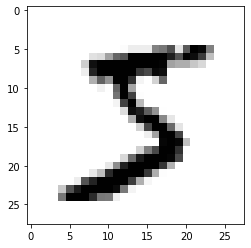

In [14]:
import matplotlib.pyplot as plt 
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 

## EX2

Prendre un échantillon de données appelé data avec une taille de 5000 exemples à l’aide 
de la fonction np.random.randint(70000, size=5000). 

Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests,  

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
echantillon = np.random.randint(70000,size=5000)
jeu = mnist.data[echantillon]
jeu_target=mnist.target[echantillon]
print(len(jeu))

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
                train_size = 0.8,test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(X_train.shape)


5000
4000
1000
(4000, 784)


Entrainer un classifieur k-nn avec k = 10 sur le jeu de données chargé. 

Afficher la classe de l’image 4 et sa classe prédite. 

Afficher le score sur l’échantillon de test 

Faire varier le nombre de voisins (k) de 2 jusqu’à 15 et afficher le score. Quel est le k 
optimal ? 

     Utilisez une boucle 
     
     Utilisez    la  function  KFold(len(X),n_folds=10,shuffle=True)  de  la  classe class sklearn.model_selection

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train,y_train)
neigh.predict(X_test)
class_test_4 = neigh.predict([X_test[4]])
class_reel_4 = y_test[4]
print(class_test_4)
print(class_reel_4)
neigh.predict_proba(X_test)
print(neigh.score(X_test, y_test))

for nb in range(2,16):
    neigh = KNeighborsClassifier(n_neighbors=nb)
    neigh.fit(X_train,y_train)
    print(nb," ",neigh.score(X_test, y_test))
kf = KFold(random_state = len(X_train), n_splits=10,shuffle=True) 
for nb in range(2,16):
    avg=[]
    for train_index, test_index in kf.split(jeu):
        X_train, X_test = jeu[train_index], jeu[test_index]
        y_train, y_test = jeu_target[train_index], jeu_target[test_index]        
        neigh = KNeighborsClassifier(n_neighbors=nb)
        neigh.fit(X_train,y_train)
        avg.append(neigh.score(X_test, y_test))
    print(nb," ",sum(avg) / len(avg))

['8']
8
2   0.927
3   0.93
4   0.922
5   0.921
6   0.924
7   0.922
8   0.918
9   0.919
10   0.921
11   0.916
12   0.916
13   0.916
14   0.914
15   0.915
2   0.9204000000000001
3   0.9286000000000001
4   0.9272
5   0.9288000000000002
6   0.9288000000000001
7   0.9278000000000001
8   0.9254
9   0.9258000000000001
10   0.923
11   0.922
12   0.9199999999999999
13   0.9204000000000001
14   0.9186
15   0.9186


Faites varier le pourcentage des échantillons (training et test) et affichez le score. Quel est 
le pourcentage remarquable ? 

In [17]:
res_arr = []

for x in np.arange(0.1,1,0.1):
    
    X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
                train_size = x,test_size=1-x, random_state=42)
    current_score = []
        
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train,y_train)
    print(x," ",neigh.score(X_test, y_test))

0.1   0.7977777777777778
0.2   0.86
0.30000000000000004   0.8822857142857143
0.4   0.8986666666666666
0.5   0.9112
0.6   0.9135
0.7000000000000001   0.916
0.8   0.921
0.9   0.948


Faites varier la taille de l’échantillon training et affichez la précision. Qu'est-ce que vous 
remarquez

In [18]:
res_array_size = []

for n in range(5000,35000,5000):
    echantillon = np.random.randint(70000,size=n)
    jeu = mnist.data[echantillon]
    jeu_target=mnist.target[echantillon]
    X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
                train_size = 0.9,test_size=0.1, random_state=42)
    
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train,y_train)
    print(n," ",neigh.score(X_test, y_test))

5000   0.934
10000   0.949
15000   0.9506666666666667
20000   0.9575
25000   0.9616
30000   0.9623333333333334


Faites varier les types de distances (p). Quelle est la meilleure distance ?

In [19]:
echantillon = np.random.randint(70000,size=10000)
jeu = mnist.data[echantillon]
jeu_target=mnist.target[echantillon]

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
            train_size = 0.9,test_size=0.1, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
neigh.fit(X_train,y_train)
print("euclidean ",neigh.score(X_test, y_test))

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
            train_size = 0.9,test_size=0.1, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3,metric='manhattan')
neigh.fit(X_train,y_train)
print("manhattan ",neigh.score(X_test, y_test))

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
            train_size = 0.9,test_size=0.1, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3,metric='chebyshev')
neigh.fit(X_train,y_train)
print("chebyshev ",neigh.score(X_test, y_test))


X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
            train_size = 0.9,test_size=0.1, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
neigh.fit(X_train,y_train)
print("minkowski ",neigh.score(X_test, y_test))

euclidean  0.953
manhattan  0.939
chebyshev  0.704
minkowski  0.953


Fixez n_job à  1 puis à -1 et calculez le temps de chacun.

In [20]:
import time
echantillon = np.random.randint(70000,size=10000)
jeu = mnist.data[echantillon]
jeu_target=mnist.target[echantillon]

X_train,X_test,y_train,y_test = train_test_split(jeu,jeu_target, 
            train_size = 0.9,test_size=0.1, random_state=42)
starttime = time.time()
neigh = KNeighborsClassifier(n_neighbors=3,n_jobs=1)
endtime = time.time()
print("Runtime : ", round((endtime - starttime)*1000,2),"ms")
neigh.fit(X_train,y_train)
print("n_jobs=1 ",neigh.score(X_test, y_test))

starttime = time.time()
neigh = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
endtime = time.time()
print("Runtime : ", round((endtime - starttime)*1000,2),"ms")
neigh.fit(X_train,y_train)
print("n_jobs=-1 ",neigh.score(X_test, y_test))

Runtime :  0.48 ms
n_jobs=1  0.954
Runtime :  0.15 ms
n_jobs=-1  0.954
